## Practical Work 2
# **Prepaied by Dr. Hatem el-attar **

> # Nader Mohamed Elhadedy

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

# **Step_1 :** Import numpy, matplotlib.pyplot and make it inline

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**Step_2:** To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
 <b>yi = a*xi + b (and a = -2, b = 1)</b>


In [ ]:
X = np.arange(0,20+1)
Y = -2 * X + 1

In [ ]:
print('X:',X)
print('Y:',Y)

X: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Y: [  1  -1  -3  -5  -7  -9 -11 -13 -15 -17 -19 -21 -23 -25 -27 -29 -31 -33
 -35 -37 -39]


In [ ]:
import pandas as pd
dataset = pd.DataFrame({'X': X, 'Y': Y}, columns=['X', 'Y'])
print(dataset)

     X   Y
0    0   1
1    1  -1
2    2  -3
3    3  -5
4    4  -7
5    5  -9
6    6 -11
7    7 -13
8    8 -15
9    9 -17
10  10 -19
11  11 -21
12  12 -23
13  13 -25
14  14 -27
15  15 -29
16  16 -31
17  17 -33
18  18 -35
19  19 -37
20  20 -39


In [ ]:
dataset.head()

,X,Y
0,0,1
1,1,-1
2,2,-3
3,3,-5
4,4,-7


In [ ]:
dataset.tail()

,X,Y
16,16,-31
17,17,-33
18,18,-35
19,19,-37
20,20,-39


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       21 non-null     int64
 1   Y       21 non-null     int64
dtypes: int64(2)
memory usage: 464.0 bytes


In [ ]:
dataset.describe()

,X,Y
count,21.000000,21.000000
mean,10.000000,-19.000000
std,6.204837,12.409674
min,0.000000,-39.000000
25%,5.000000,-29.000000
50%,10.000000,-19.000000
75%,15.000000,-9.000000
max,20.000000,1.000000


Step_3: plot x and y

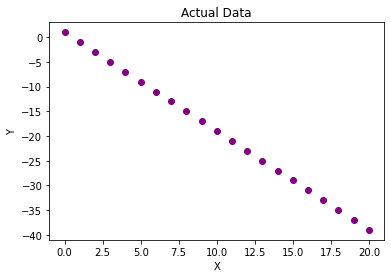

In [ ]:
plt.scatter(X,Y, color='purple')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Actual Data")
plt.show()

#### **Step_4:** Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [ ]:
def gradient_descent(x_data, y_data, alpha, itrs):

    # handling inputs
    X = x_data
    Y = y_data
    L = alpha

    # initializing variables
    theta_0 = 0
    theta_1 = 0
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    loss_list = []

    for i in range(itrs):

        Y_pred = theta_0 + theta_1 * X
        theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
        theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)

        theta_0 = theta_0 - L * theta0_grd
        theta_1 = theta_1 - L * theta1_grd

        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)

        H = theta_0 + theta_1 * X
        hypothesis_output.append(H)

        J_val = (1/(2*len(X))) * np.sum((H - Y)**2)
        loss_list.append(J_val)

    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list

#### **Step_5:** Try your function with any input parameters of your choice.

In [ ]:
trial = gradient_descent(X, Y, 0.0005, 60)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

-0.12943931930749805 -1.890269295336435


#### **Step_6:** Calculate r2 score

In [ ]:
def R2_score(actudal_y_data, final_predicted_y_data):
    
    SStot = np.sum((actudal_y_data - np.mean(actudal_y_data))**2)
    SSres = np.sum((actudal_y_data - final_predicted_y_data)**2)
    R2 = 1 - (SSres / SStot)

    return R2

In [ ]:
Y_pred_final = trial[4][-1]

R2_score(Y, Y_pred_final)

0.9969827534570521

#### **Step_7:** Plot loss vs. epochs

In [ ]:
def plot_loss_curve(listOfLosses):
    plt.plot(list(range(len(listOfLosses))), listOfLosses, '-o', color='purple')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.show()

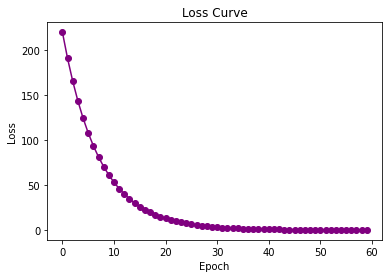

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

#### **Step_8:** Plot Theta_0 vs. loss and Theta_1 vs. loss

In [ ]:
def plot_theta_vs_loss(loss_list, theta_list):
    plt.plot(theta_list, loss_list, '-o', color='purple')
    plt.xlabel("Theta")
    plt.ylabel("Loss")
    plt.title("Loss vs Theta")
    plt.show()

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]

listOfLosses = trial[5]

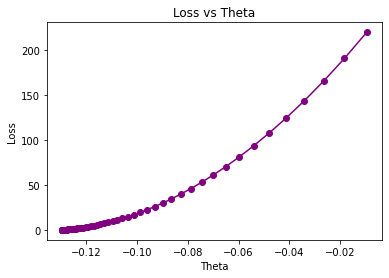

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

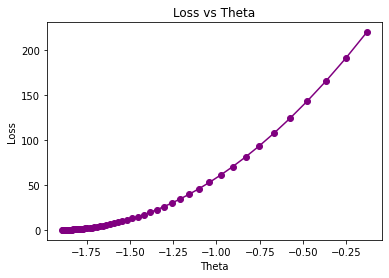

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

#### **Step_9:** Plot all regression lines till converge

In [ ]:
def plot_all_regressions(x_data, y_data, hypothesis_outputs):
    plt.scatter(x_data, y_data, color="purple", label="Actual Data")
    plt.legend()
    plt.xlabel("Original Values")
    plt.ylabel("Predicted Values")
    for H in hypothesis_outputs:
        plt.plot(x_data, H, 'r')
    plt.show()

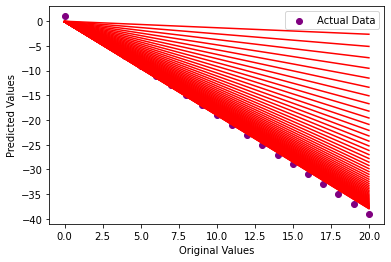

In [ ]:
hypothesis_outputs = trial[4]

plot_all_regressions(X, Y, hypothesis_outputs)

#### **[Step_10:](https://)** Plot the best regression line

In [ ]:
def plot_best_regression(x_data, y_data, hypothesis_outputs):
    
    plt.scatter(x_data, y_data, color="purple", label="Actual Data")
    plt.xlabel("Original Values")
    plt.ylabel("Predicted Values")
    plt.plot(x_data, hypothesis_outputs[-1], label="Regression Line", color='r')
    plt.legend()
    plt.show()

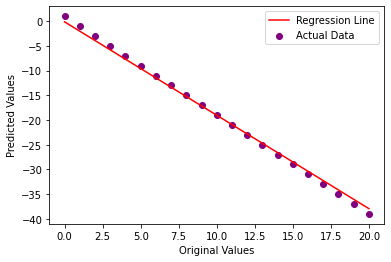

In [ ]:
hypothesis_outputs = trial[4]

plot_best_regression(X, Y, hypothesis_outputs)

#### **Step_11:** Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [ ]:
# increase alpha, decrease iterations
trial_2 = gradient_descent(X, Y, 0.0003, 100)
theta_0, theta_1 = trial_2[0:2]

print(theta_0, theta_1)

-0.1293159176982176 -1.8885827845618761


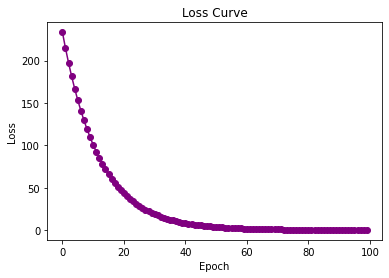

In [ ]:
listOfLosses = trial_2[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial_2[2]
listOfThetas_1 = trial_2[3]
listOfLosses = trial_2[5]

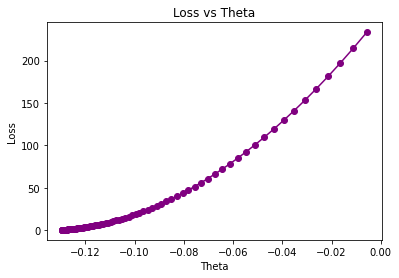

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

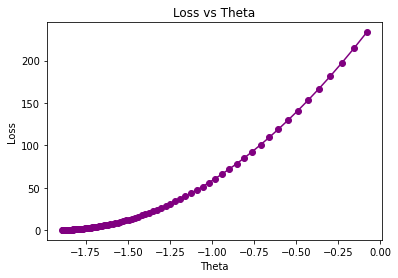

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

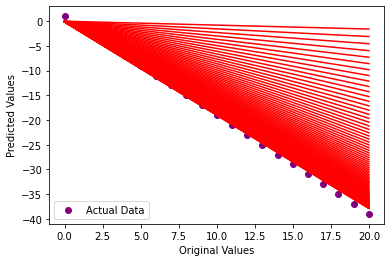

In [ ]:
hypothesis_outputs = trial_2[4]

plot_all_regressions(X, Y, hypothesis_outputs)

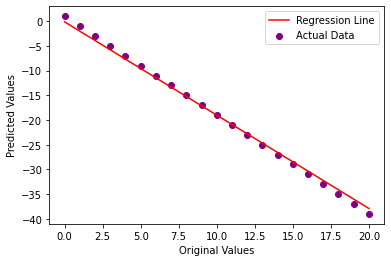

In [ ]:
hypothesis_outputs = trial_2[4]

plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [ ]:
# decrease alpha, increase iterations
trial_3 = gradient_descent(X, Y, 0.0001, 10000)
theta_0, theta_1 = trial_3[0:2]

print(theta_0, theta_1)

0.12663346411294835 -1.9359701040321826


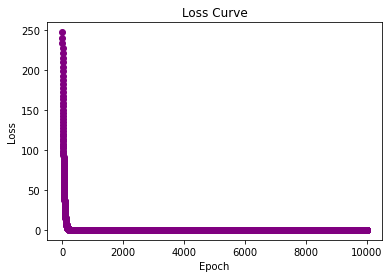

In [ ]:
listOfLosses = trial_3[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial_3[2]
listOfThetas_1 = trial_3[3]
listOfLosses = trial_3[5]

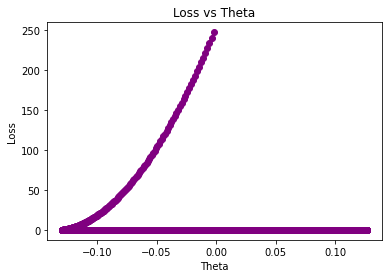

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

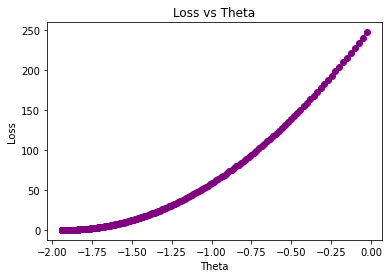

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

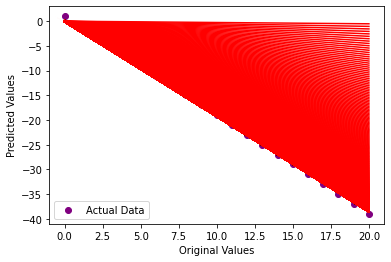

In [ ]:
hypothesis_outputs = trial_3[4]

plot_all_regressions(X, Y, hypothesis_outputs)

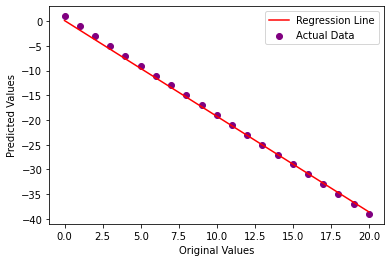

In [ ]:
hypothesis_outputs = trial_3[4]

plot_best_regression(X, Y, hypothesis_outputs)

#### **Step_12:** Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [ ]:
def mini_batch_gradient(x_data, y_data, alpha, batch_size):

    # handling inputs
    X_M = x_data
    Y_M = y_data
    L = alpha
    b = batch_size
    itrs = int(len(X)/b)

    # initializing variables
    theta_0, theta_1 = 0,0
    start = 0
    end = b
    loss_list = []
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    total_hypothesis_output = []

    for i in range(itrs):

        Y_pred = theta_0 + theta_1 * X_M[start:end]
        theta_0 = theta_0 - (L/b) * np.sum(Y_pred - Y_M[start:end])
        theta_1 = theta_1 - (L/b) * np.sum((Y_pred - Y_M[start:end]) * X_M[start:end])

        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)

        H = theta_0 + theta_1 * X_M[start:end]
        hypothesis_output.append(H)
        loss_list.append((1/(2*b)) * np.sum((H - Y_M[start:end])**2))
        total_hypothesis_output.append(theta_0 + theta_1 * X_M)

        start += b
        end += b
        
        
    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list, total_hypothesis_output

In [ ]:
trial = mini_batch_gradient(X, Y, 0.01, 3)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

-0.2701922238220449 -1.9359430967204514


In [ ]:
Y_pred_final = theta_0 + theta_1 * X

R2_score(Y, Y_pred_final)

0.9962712780854782

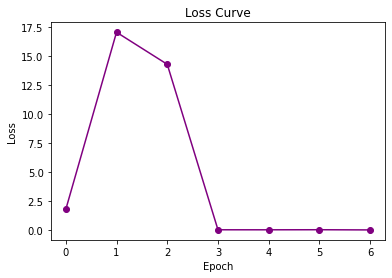

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]

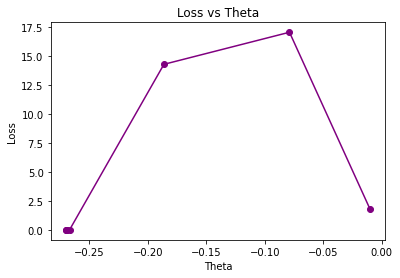

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

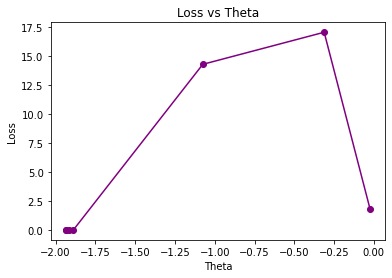

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

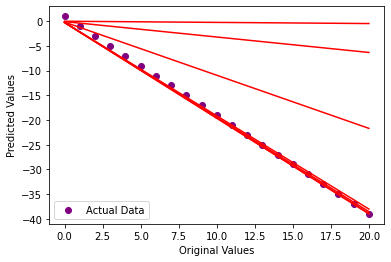

In [ ]:
hypothesis_outputs = trial[6]

plot_all_regressions(X, Y, hypothesis_outputs)

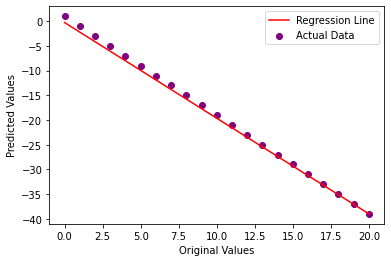

In [ ]:
hypothesis_outputs = trial[6]

plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [ ]:
# increase batch size
trial_2 = mini_batch_gradient(X, Y, 0.01, 7)

In [ ]:
theta_0, theta_1 = trial_2[0:2]

print(theta_0, theta_1)

-0.210149 -1.8592009999999997


In [ ]:
Y_pred_final = theta_0 + theta_1 * X

R2_score(Y, Y_pred_final)

0.9947770395273795

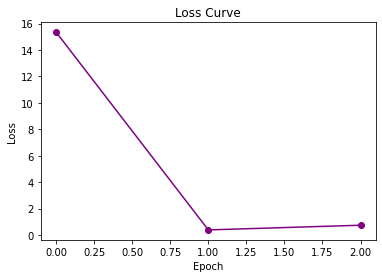

In [ ]:
listOfLosses = trial_2[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial_2[2]
listOfThetas_1 = trial_2[3]
listOfLosses = trial_2[5]

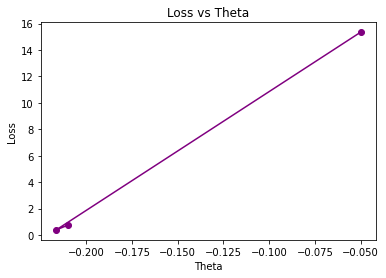

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

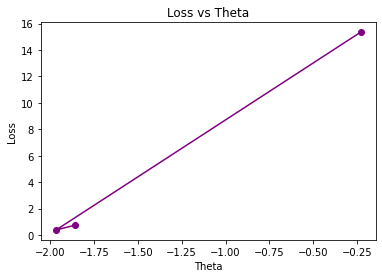

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

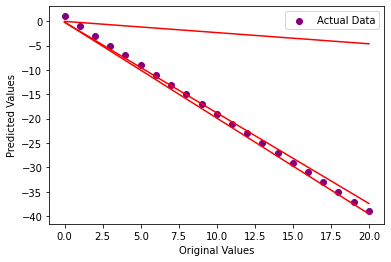

In [ ]:
hypothesis_outputs = trial_2[6]

plot_all_regressions(X, Y, hypothesis_outputs)

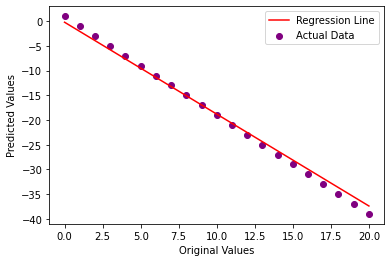

In [ ]:
hypothesis_outputs = trial_2[6]

plot_best_regression(X, Y, hypothesis_outputs)

## Stochastic GD

#### **Step_13**: Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [ ]:
def stochastic_gradient_descent(x_data, y_data, alpha, itrs):

    from sklearn.utils import shuffle
    
    # handling inputs
    X = x_data
    Y = y_data
    L = alpha
    
    X_S, Y_S = shuffle(X,Y,random_state=123)
    
    # initializing variables
    theta_0 = 0
    theta_1 = 0
    theta_0_list = []
    theta_1_list = []
    hypothesis_output = []
    loss_list = []
    total_hypothesis_output = []

    
    for i in range(itrs):
        for j in range(len(X_S)):
            
            Y_pred = theta_0 + theta_1 * X_S[j]
            theta_0 = theta_0 - L * (Y_pred - Y_S[j])
            theta_1 = theta_1 - L * ((Y_pred - Y_S[j]) * X_S[j])
            
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            
            H = theta_0 + theta_1 * X_S[j]
            
            hypothesis_output.append(H)
            loss_list.append(0.5 * (H - Y_S[j])**2)
            
            total_hypothesis_output.append(theta_0 + theta_1 * X)



    return theta_0, theta_1, theta_0_list, theta_1_list, hypothesis_output, loss_list, total_hypothesis_output

In [ ]:
trial = stochastic_gradient_descent(X, Y, 0.01, 50)

In [ ]:
theta_0, theta_1 = trial[0:2]

print(theta_0, theta_1)

0.9925472617234197 -1.998433264066186


In [ ]:
Y_pred_final = theta_0 + theta_1 * X

R2_score(Y, Y_pred_final)

0.9999989262437249

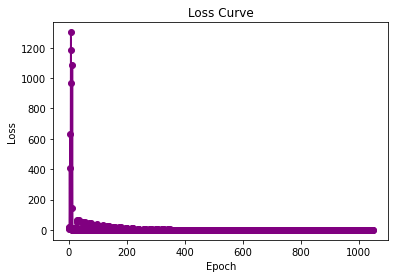

In [ ]:
listOfLosses = trial[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial[2]
listOfThetas_1 = trial[3]
listOfLosses = trial[5]

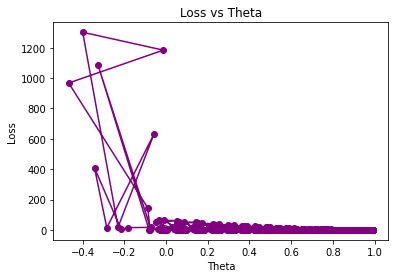

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

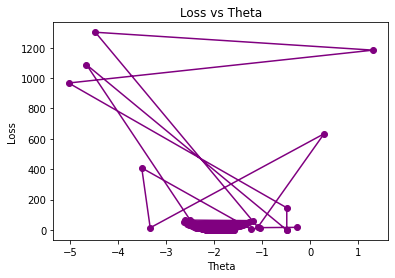

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

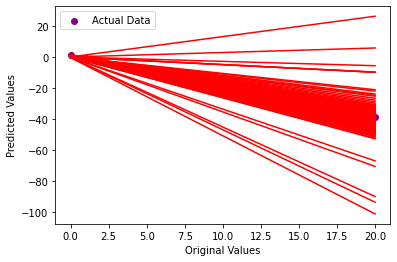

In [ ]:
hypothesis_outputs = trial[6]

plot_all_regressions(X, Y, hypothesis_outputs)

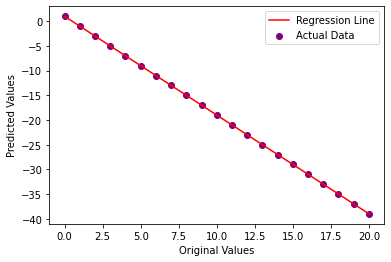

In [ ]:
hypothesis_outputs = trial[6]

plot_best_regression(X, Y, hypothesis_outputs)

<hr>

In [ ]:
trial_2 = stochastic_gradient_descent(X, Y, 0.001, 50)

In [ ]:
theta_0, theta_1 = trial_2[0:2]

print(theta_0, theta_1)

0.1412937656450365 -1.9379832585169412


In [ ]:
Y_pred_final = theta_0 + theta_1 * X

R2_score(Y, Y_pred_final)

0.9986505211592734

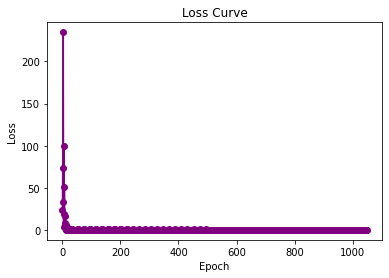

In [ ]:
listOfLosses = trial_2[5]
plot_loss_curve(listOfLosses)

In [ ]:
listOfThetas_0 = trial_2[2]
listOfThetas_1 = trial_2[3]
listOfLosses = trial_2[5]

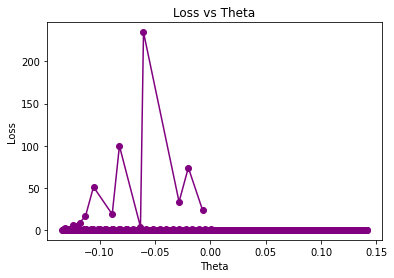

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_0)

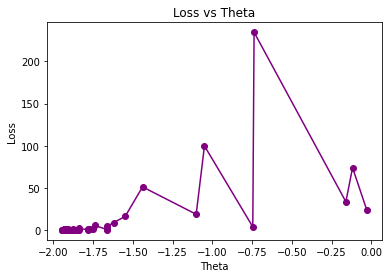

In [ ]:
plot_theta_vs_loss(listOfLosses, listOfThetas_1)

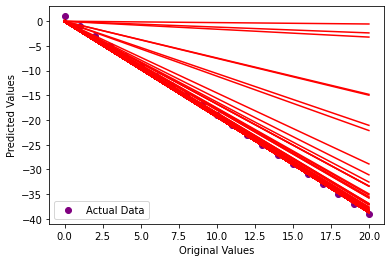

In [ ]:
hypothesis_outputs = trial_2[6]

plot_all_regressions(X, Y, hypothesis_outputs)

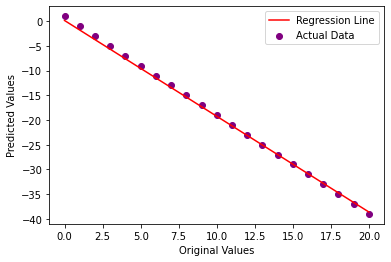

In [ ]:
hypothesis_outputs = trial_2[6]

plot_best_regression(X, Y, hypothesis_outputs)